##### PCA Dimensionality Reduction Technique Analysis

Principal Component Analysis (PCA) is a dimensionality - reduction technique frequently employed to reduce the dimensionality of datasets with a very large number of duimensions.
In essence, what PCA does is to transform a large set of variables into a smaller set of new variables that retain the majority of the information carried within the original data.

PCA aims to retain as much information(valuable) as possible while representing it on a lower dimensional space.

In [64]:
#Defining Function
"""Function for scatterplot time efficiency"""
def scatterplots(a,b):
    fig, ax = plt.subplots()
    ax.scatter(df[a], df[b])
    plt.show()

In [67]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

#Randomly Generate Numerical Data
randomlist1 = []
randomlist2 = []
randomlist3 = []

for i in range(0,50):
    x = random.randint(1,10000)
    randomlist1.append(x)
for i in range(0,50):
    y = random.randint(1,20000)
    randomlist2.append(y)
for i in range(0,50):
    z = random.randint(1,5000)
    randomlist3.append(z)

#Transfering the randomly generated data from datatype list to dictionaries
Dictionary = {'X':randomlist1, 'Y':randomlist2,'Z':randomlist3}
    
#Create a DataFrame from above Dictionary
df = pd.DataFrame(Dictionary)
#Create copy of original dataframe
original_df = df.copy(deep=True)

#dataframe head & summary statistics
df.head(), df.describe()

(      X      Y     Z
 0  2152   6159    23
 1  5846   7430  1279
 2  3251    965  1053
 3  6367  16068  3910
 4  7946  18678   437,
                  X             Y           Z
 count    50.000000     50.000000    50.00000
 mean   4852.280000  10558.380000  2141.40000
 std    2827.845737   6018.582062  1452.68968
 min      35.000000    965.000000    23.00000
 25%    2491.000000   6204.750000   932.50000
 50%    4495.000000  10765.500000  1943.00000
 75%    7084.500000  16389.750000  3404.75000
 max    9913.000000  18826.000000  4887.00000)

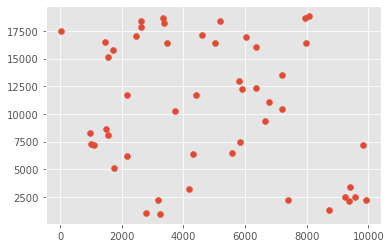

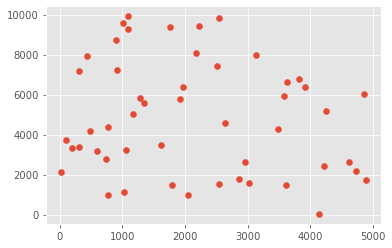

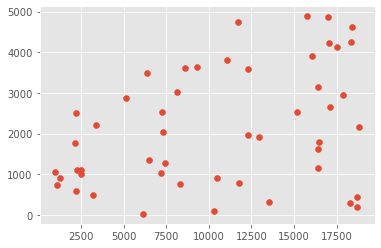

(None, None, None)

In [71]:
#Use scatterplot to plot original features for observational analysis
scatterplots('X','Y'), scatterplots('Z','X'), scatterplots('Y','Z')

Note: When PCA is implemented we end up with new features(virtual features) called Principal Components in which the number of principal components is equal to the number of original features.

In [19]:
#import PCA from sklearn library
from sklearn.decomposition import PCA
model = PCA()
#fit PCA model
model.fit(df)
#transform data
transform = model.transform(df)

PCA is a linear transformation of the data. An eigenvector of any linear transformation is a nonzero vector in Rn that will change magnitude and not direction when transformed by a scalar value (known as an eigenvalue).
Eigenvalues represent variance explained by each eigenvector. They are also known as charachteristic roots.

In [16]:
print(transform[:5],type(transform))

[[-9512.76888253 -1914.97742541 -2681.95706777]
 [ 5377.78458693  1660.73899831 -1083.25058118]
 [-1213.19083894   220.13730455   588.50289809]
 [ 8105.10495692 -4644.55337519  1195.56965836]
 [-2475.15977434  1569.32685502  -412.21132834]] <class 'numpy.ndarray'>


In [81]:
#Eigenvalues to Dataframe fro observational analysis
new_df = pd.DataFrame(transform)
print(new_df.head())

             0            1            2
0  -862.993748 -2597.891051  1701.903760
1  5392.436820 -1315.328879 -1618.172095
2  -170.077100 -1949.736349 -2419.161515
3  -877.156900   -77.988877  1704.441831
4  4596.873207 -3900.337575   320.048888


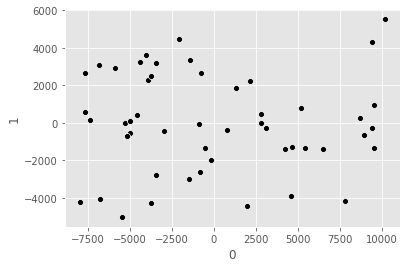

In [82]:
import seaborn as sns
sns.scatterplot(x = new_df[0], y = new_df[1], color = 'black')
plt.show()

In [ ]:
sns.scatterplot(x = (X), y = (Y), data = visuals, color = 'r', alpha = 0.4)
    sns.set_style('darkgrid')
    plt.show()

In [20]:
#examining the Eigenvectors
print(model.explained_variance_)

[30937302.72439446  6895100.88139312  1653586.01870222]


In [25]:
#Variance within each principal component
print(model.explained_variance_ratio_)

[0.78350076 0.17462145 0.04187779]


Examines how much of the variance in the data each principal component explains.

Interpretation of the above eigenvalues is as follows:

Eignvalue1 = 0.78 %

Eigenvalue2 = 0.17 %

Eigenvalue3 = 0.04 %


The cumulative variance explained by the first principal component is 78 %. 

In other words the first principal component can be used in place all orginal variables and still capture 78 % of the variance in the data, which essentially with large scale datasets helps reduce the number of dimensions compared to the orginal dimensionality of the data.

Note:
If you sum all the variance ratios up they should equal 1 (or 100%). However, due to rounding errors, the sum may be slightly higher or lower than 1.

In [35]:
#Principal Components
print(model.components_[0,], model.components_[1,], model.components_[2,])

[-0.05510208  0.99670891 -0.05945683] [ 0.99287642  0.04839532 -0.10887747] [0.10564171 0.06503266 0.99227546]


Observing the loadings of each principal component above. This is how much each of the original variables contributes to the each new principal component.

##### Plotting / Deciding how many principal components to use
A common practice is to plot the eigenvalues for each component on a screen plot. Setting a theshold in advance is also a common practice.

In [37]:
#import matplotlib library
import matplotlib.pyplot as plt

Text(0, 0.5, 'Eigenvalue')

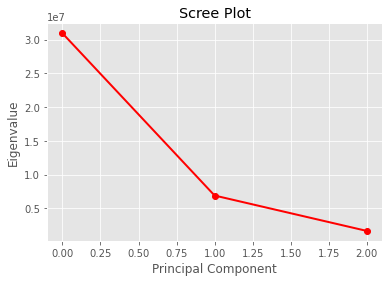

In [51]:
principal_component_number = np.arange(3) + 1
#line-plot
plt.plot(principal_component_number, model.explained_variance_, 'ro-', linewidth=2)
plt.style.use('ggplot')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

As we can see from the above plot and as envisioned from analysis of the variance within the principal component principal compoent onw carries most of the data's variance. As mentioned above approximately 78% of the data's variance has been captured within principal component one. 
